# Кинопрокат
Таблица `mkrf_movies` содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 

- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` *—* объём возвратных средств государственной поддержки;
- `nonrefundable_support` *—* объём невозвратных средств государственной поддержки;
- `financing_source` *—* источник государственного финансирования;
- `budget` *—* общий бюджет фильма;
- `ratings` *—* рейтинг фильма на КиноПоиске;
- `genres` *—* жанр фильма.

Обратите внимание, что столбец `budget` **уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Таблица `mkrf_shows` содержит сведения о показах фильмов в российских кинотеатрах.

- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

# Задание № 0

С помощью библиотеки pandas (импортирована под алиасом pd)
* прочитайте данные из csv-файлов mkrf_movies.csv и mkrf_shows
* запишите датафреймы в переменные movies_df и shows_df соответственно

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

movies_df = pd.read_csv('mkrf_movies.csv')
shows_df = pd.read_csv('mkrf_shows.csv')

# Задание № 1

### Опишите проблемы типов имеющихся данных и варианты исправления

### Исследуйте дубликаты и пропуски. Какова их природа в этом наборе данных? Можно ли это исправить?

Использовать методы
* duplicated и/или смежные (drop_duplicates)
* isna() и/или смежные

Ссылки:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html


Что может ещё понадобиться:

* Преобразование к численным типам данных. Для этого можно
    * воспользоваться методом **to_numeric**, аналогичным **to_datetime**, в связке с методом **apply**
    * воспользоваться методом astype('int64')
* Сброс данных (drop)
    
Ссылки:

https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html#pandas.DataFrame.astype

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [2]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


AxesSubplot(0.125,0.125;0.62x0.755)


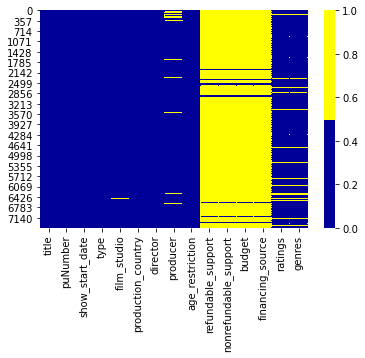

In [4]:
cols = movies_df.columns
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
print(sns.heatmap(movies_df[cols].isna(), cmap=sns.color_palette(colours)))

In [5]:
movies_df['show_start_date'] = pd.to_datetime(movies_df['show_start_date']) # Переводим даты в формат datetime
movies_df['puNumber'] = movies_df['puNumber'].apply(pd.to_numeric, errors='coerce') # Переводим puNumber в формат float
# В ratings хранятся строки с оценкой 1-10 или в процентах, переведем все в один формат
movies_df['ratings'] = movies_df['ratings'].str.strip('%')
movies_df['ratings'] = movies_df['ratings'].apply(pd.to_numeric, errors='coerce')
movies_df['ratings'].loc[movies_df['ratings'] > 10] = movies_df['ratings'].loc[movies_df['ratings'] > 10] / 10

In [6]:
train_corr = movies_df.corr()
corr_values = train_corr['ratings']
corr_values = abs(corr_values).sort_values(ascending=False)
corr_values

ratings                  1.000000
puNumber                 0.137539
nonrefundable_support    0.125646
budget                   0.093117
refundable_support       0.003797
Name: ratings, dtype: float64

In [7]:
#for i in movies_df.loc[movies_df['puNumber'].duplicated() == True]['puNumber']:
 #   print(movies_df.loc[movies_df['puNumber'] == i])
movies_df.iloc[[4638, 4639, 5067, 5068]]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
4638,Как жениться и остаться холостым,221154310.0,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия"
4639,Иоанна - женщина на папском престоле /По роман...,221154310.0,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история"
5067,Анализируй это!,221054410.0,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал"
5068,Анализируй то!,221054410.0,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал"


In [8]:
# Единственые дупликаты, которые выглядят странно, находятся в столбце 'puNumber'
# Но этих номеров прокатного удостоверения в mkrf_shows нет, а значит проблем с ними не возникут
# Поэтому оставим их, т.к. в них может оказаться важная информация для задания 4
for column in movies_df:
    print(column, movies_df[column].duplicated().sum())

title 714
puNumber 2
show_start_date 5521
type 7478
film_studio 1995
production_country 6535
director 2674
producer 2136
age_restriction 7481
refundable_support 7451
nonrefundable_support 7410
budget 7195
financing_source 7482
ratings 7401
genres 6743


# Задание № 2

### Посчитайте динамику сборов по годам премьер фильмов. В каком году медианная сумма сборов была максимальной?

**Было бы здорово визуализировать результаты!**

Что может понадобиться:

* Сортировки данных методом **sort_values** (с обязательных указанием по какому индексу или столбцу)
* Удаление дубликатов методом **drop_duplicates**
* Слияние или объединение DataFrame или Series методами **merge** и **join** (первого должно хватить)
* Переименование столбка методом **rename**
* **Самое важное**: группировка данных методом **groupby**
    * обратите особое внимание на аргументы by и as_index
    * по сути это операция разбиения данных, применения некоторой функции и объединение результатов
    * примеры использтвания будут в смежном файле

Ссылки:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html



In [9]:
# отсортируем по времени и удалим дупликаты из 'title'
# получим фильмы с датами премьер
first_show = movies_df.sort_values(by='show_start_date')
first_show['title'] = first_show['title'].drop_duplicates()

In [10]:
df2 = pd.merge(first_show, shows_df, on='puNumber')
df2['show_start_date'] = df2['show_start_date'].dt.year
df2.groupby('show_start_date')['box_office'].median().nlargest(1)

show_start_date
2017    9968340.0
Name: box_office, dtype: float64

<AxesSubplot:xlabel='show_start_date'>

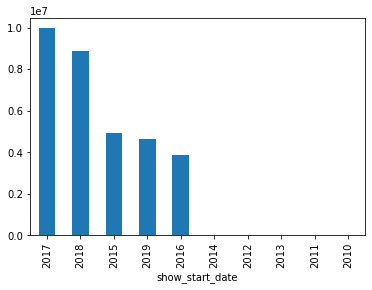

In [11]:
df2.groupby('show_start_date')['box_office'].median().sort_values(ascending=False).plot.bar()

# Задание № 3

### С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

**Было бы здорово визуализировать результаты!**

Что может понадобиться:
* См. Задание № 2

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = pd.merge(movies_df, shows_df, on='puNumber')
df['show_start_date'] = df['show_start_date'].dt.year
df.groupby('show_start_date')['box_office'].mean().sort_values(ascending=False)

show_start_date
2017   136032793.326
2018   104565059.230
2019    91369261.848
2016    91000569.852
2015    84940570.315
2014    26684415.266
2013      161954.925
2011      129383.165
2012       54339.242
2010       23130.038
Name: box_office, dtype: float64

<AxesSubplot:xlabel='show_start_date'>

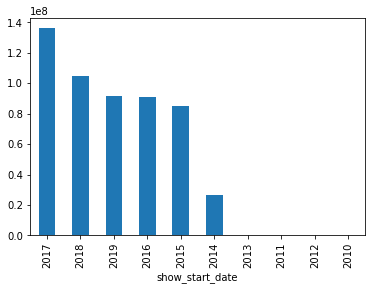

In [13]:
df.groupby('show_start_date')['box_office'].mean().sort_values(ascending=False).plot.bar()

In [14]:
df.groupby('show_start_date')['box_office'].median().sort_values(ascending=False)

show_start_date
2017   9968340.000
2018   8891102.210
2015   4920933.000
2019   4627798.345
2016   3846679.410
2014     18160.000
2012      5660.000
2013      3522.500
2011      3000.000
2010      1700.000
Name: box_office, dtype: float64

<AxesSubplot:xlabel='show_start_date'>

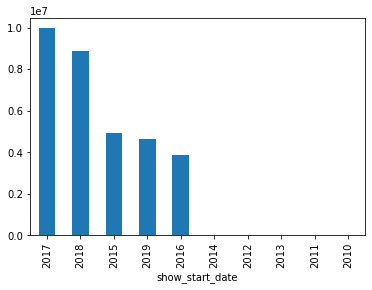

In [15]:
df.groupby('show_start_date')['box_office'].median().sort_values(ascending=False).plot.bar()

# Задание № 4

### Выделите имена продюсеров из столбца producer. У кого из них самый высокий средний рейтинг фильмов?


Что может понадобиться:
* См. Задание № 2

In [16]:
movies_df = movies_df.dropna(subset=['producer'])
movies_df['producer'] = movies_df['producer'].str.replace(', ', ',').str.split(',')

In [17]:
prod_movies_df = movies_df.explode('producer')
prod_movies_df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915.000,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,Дэвид Валдес,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама"
0,Открытый простор,221048915.000,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,Кевин Костнер,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама"
0,Открытый простор,221048915.000,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,Джейк Эбертс,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.200,"боевик,драма,мелодрама"
2,Особо опасен,221038416.000,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,Джим Лемли,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер"
2,Особо опасен,221038416.000,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,Джейсон Нетер,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер"


In [18]:
prod_movies_df.groupby('producer')['ratings'].mean().sort_values(ascending=False).nlargest(10)

producer
Оскар Крамер    9.900
Е.Ковалева      9.900
Е.Калинина      9.900
Хуго Сидмэн     9.900
К.Терещенко     9.900
Эктор Бабенко   9.900
Д.Колеров       9.800
Б.Куломзин      9.800
Э.Ким           9.800
Д.Руюежин       9.800
Name: ratings, dtype: float64